In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

#dir = 'C:\\Users\\Richie Lee\\Desktop\\College\\1 San Jose State University\\9 2021 fall semester\\CMPE 188\\hw2&hw3\\photos\\train_set'
train_dir = './datasets/train_set/'

targets = ['buildings','forest','glacier','mountain','sea','street']
train_data = []
#load train set
for target in targets:
    train_path = os.path.join(train_dir,target)
    label = targets.index(target)
    for img in os.listdir(train_path):
        train_imgpath = os.path.join(train_path, img) #train_imgpath = './xxx/xxx/xxx.jpg'
        train_img = cv2.imread(train_imgpath)
        try:
            train_img = cv2.resize(train_img,(150,150)) #**very impoertant step
            train_image = np.array(train_img).flatten()
            train_data.append([train_image,label])
        except Exception as e:
            pass

len(train_data)

14338

## train data shuffled

In [2]:
random.shuffle(train_data)
train_data

[[array([175, 204, 218, ...,   0,  19,  64], dtype=uint8), 0],
 [array([ 63,  62,  41, ..., 163, 147, 134], dtype=uint8), 0],
 [array([168, 143, 139, ...,  69,  75,  82], dtype=uint8), 2],
 [array([ 73,  92, 189, ...,  47,  39,  49], dtype=uint8), 4],
 [array([104,  53,  27, ..., 149, 167, 100], dtype=uint8), 4],
 [array([198, 151, 123, ...,  53,  46,  49], dtype=uint8), 5],
 [array([251, 253, 254, ...,  89,  91,  91], dtype=uint8), 0],
 [array([133, 145, 155, ...,  28,  20,  13], dtype=uint8), 2],
 [array([221, 221, 221, ..., 115, 120, 118], dtype=uint8), 4],
 [array([208, 198, 191, ..., 161, 135, 111], dtype=uint8), 2],
 [array([148,  92,  57, ..., 190, 200, 210], dtype=uint8), 3],
 [array([21, 33, 35, ...,  5, 73, 38], dtype=uint8), 1],
 [array([240, 225, 216, ...,  38,  52,  51], dtype=uint8), 3],
 [array([216, 209, 200, ...,  51,  24,   3], dtype=uint8), 3],
 [array([189, 155, 131, ..., 167, 158, 161], dtype=uint8), 2],
 [array([ 0,  7, 10, ...,  3,  7,  8], dtype=uint8), 0],
 [ar

## train data shuffled

In [3]:
train_features = []
train_labels = []

for train_feature, train_label in train_data:
    train_features.append(train_feature)
    train_labels.append(train_label)

In [4]:
np_train_features = np.array(train_features)
np_train_labels = np.array(train_labels)

In [5]:
np_train_features

array([[175, 204, 218, ...,   0,  19,  64],
       [ 63,  62,  41, ..., 163, 147, 134],
       [168, 143, 139, ...,  69,  75,  82],
       ...,
       [246, 235, 185, ...,  72,  68,  43],
       [ 34,  35,  39, ...,  41,  47,  46],
       [ 73, 101,  58, ...,   0,   6,   0]], dtype=uint8)

In [6]:
np_train_features = np_train_features.astype(np.int32)

In [7]:
print('total data shape: ',np_train_features.shape)
print('total labels shape: ', np_train_labels.shape)

total data shape:  (14338, 67500)
total labels shape:  (14338,)


## Dementionality reduction PCA(0.95)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, svd_solver='full')

In [19]:
np_train_features_pca = pca.fit_transform(np_train_features)
np_train_features_pca

array([[ 1.43357470e+04,  6.36444241e+03,  2.40931522e+03, ...,
         7.24276115e+01,  8.59633886e+01,  1.28014267e+02],
       [-1.05746639e+04, -6.14260723e+03,  3.60922897e+03, ...,
         2.72152533e+00,  1.86000564e+01, -2.04003292e+01],
       [-8.35706369e+03,  2.07693928e+03,  7.32362015e+02, ...,
         5.32858099e+01, -3.30045616e+01,  1.98856919e-01],
       ...,
       [-3.15894191e+02, -9.29710945e+03, -1.81382557e+03, ...,
         1.67898981e+01, -3.46515435e+01,  2.41341214e+01],
       [ 8.72145811e+03, -8.65005729e+01, -1.42483717e+02, ...,
         8.60948664e+00, -8.11800694e+01,  1.48383083e+01],
       [-7.86589940e+03,  2.81488580e+03, -8.79976881e+02, ...,
        -8.12239603e-01, -2.96996392e+00, -4.51691997e+00]])

In [20]:
np_train_features_pca.shape

(14338, 3772)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np_train_features_pca, np_train_labels)

In [26]:
X_train.shape

(10753, 3772)

In [27]:
from sklearn.svm import SVC
model = SVC(C=3)

In [28]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6691771269177127

In [30]:
y_predict = model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict,target_names=targets))

              precision    recall  f1-score   support

   buildings       0.61      0.54      0.58       595
      forest       0.83      0.81      0.82       527
     glacier       0.67      0.70      0.68       650
    mountain       0.63      0.68      0.65       644
         sea       0.60      0.54      0.57       567
      street       0.69      0.75      0.72       602

    accuracy                           0.67      3585
   macro avg       0.67      0.67      0.67      3585
weighted avg       0.67      0.67      0.67      3585



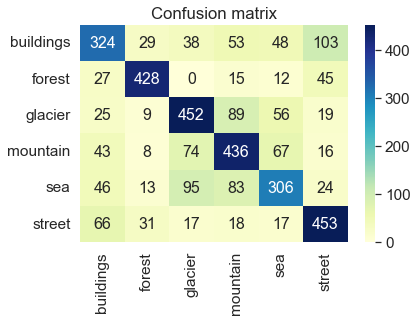

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
CM = confusion_matrix(y_test, y_predict)
ax = plt.axes()
sn.set(font_scale=1.4)
sn.heatmap(CM, annot=True,annot_kws={"size": 16},  xticklabels=targets, yticklabels=targets, ax = ax, fmt="d",cmap="YlGnBu")
ax.set_title('Confusion matrix')
plt.show()

## Dementionality reduction PCA(0.8)


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8, svd_solver='full')

In [9]:
np_train_features_pca = pca.fit_transform(np_train_features)
np_train_features_pca

array([[ 6.33381466e+02,  5.75215244e+03,  1.47911475e+03, ...,
        -2.65276155e+02,  2.76125576e+02,  1.14344349e+02],
       [ 1.03645993e+04,  5.02897849e+02,  2.36990346e+03, ...,
        -1.93515535e+02,  2.06180823e+02, -1.89082520e+02],
       [-5.81473011e+03,  2.35582331e+03,  2.34163672e+03, ...,
        -1.83402480e+02, -1.78549922e+01, -3.37581956e+01],
       ...,
       [-6.27472491e+02, -8.90088658e+03, -2.69628451e+03, ...,
         4.83108042e+01, -9.96511409e+01,  1.21241244e+02],
       [ 5.92028199e+03,  2.15710808e+03, -3.28821108e+03, ...,
         1.05154287e+02,  6.16534199e+01, -2.19235622e+01],
       [ 1.48730484e+04, -1.45595460e+02, -1.62646780e+03, ...,
        -4.58510040e+01,  1.60127016e+02, -1.43895364e+01]])

In [10]:
np_train_features_pca.shape

(14338, 338)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np_train_features_pca, np_train_labels, test_size=0.2510810433812247)

In [52]:
X_test.shape

(3600, 338)

In [95]:
from sklearn.svm import SVC
model = SVC(C=4)

### C= 8: score = 0.67083
### C= 5: score = 0.67583
### C =4: score = 0.67666  <-
### C= 3: score = 0.67250

In [96]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6766666666666666

In [97]:
y_predict = model.predict(X_test)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict,target_names=targets))

              precision    recall  f1-score   support

   buildings       0.62      0.56      0.59       584
      forest       0.82      0.84      0.83       548
     glacier       0.68      0.67      0.68       643
    mountain       0.61      0.71      0.66       624
         sea       0.58      0.49      0.53       577
      street       0.71      0.75      0.73       624

    accuracy                           0.67      3600
   macro avg       0.67      0.67      0.67      3600
weighted avg       0.67      0.67      0.67      3600



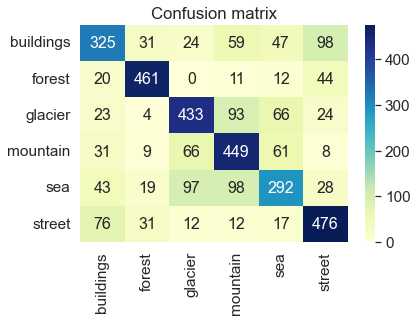

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
CM = confusion_matrix(y_test, y_predict)
ax = plt.axes()
sn.set(font_scale=1.4)
sn.heatmap(CM, annot=True,annot_kws={"size": 16},  xticklabels=targets, yticklabels=targets, ax = ax, fmt="d",cmap="YlGnBu")
ax.set_title('Confusion matrix')
plt.show()

In [100]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
#load test set
test_data = []
test_dir = './datasets/test_set/'

for img in os.listdir(test_dir):
    path = os.path.join(test_dir, img)
    test_img = cv2.imread(path)
    
    try:
        test_img = cv2.resize(test_img,(150,150))
        image = np.array(test_img).flatten()
        test_data.append([image,img])
    except Exception as e:
        pass

len(test_data)

3600

In [101]:
test_data

[[array([  4,   7,  21, ..., 109,  88,  86], dtype=uint8),
  '1000 - Copy - Copy.jpg'],
 [array([222, 194, 160, ...,  75, 107, 126], dtype=uint8), '10113.jpg'],
 [array([250, 250, 250, ...,  59,  63,  74], dtype=uint8), '10144.jpg'],
 [array([104,  94,  47, ...,  67,  70,  78], dtype=uint8), '10151.jpg'],
 [array([241, 246, 244, ..., 124, 101, 109], dtype=uint8), '10161.jpg'],
 [array([153, 106,  44, ...,  30,  20,  20], dtype=uint8), '10210.jpg'],
 [array([230, 199, 146, ...,  80, 198, 179], dtype=uint8), '1024.jpg'],
 [array([95, 78, 69, ..., 42, 45, 59], dtype=uint8), '1025.jpg'],
 [array([ 0,  6,  4, ..., 13,  6, 13], dtype=uint8), '10318.jpg'],
 [array([ 30,  30,  30, ..., 100, 100, 100], dtype=uint8), '10374.jpg'],
 [array([ 53,  32,   4, ..., 122,  99,  73], dtype=uint8), '10383.jpg'],
 [array([ 95,  46,  14, ...,  56,  92, 116], dtype=uint8),
  '1040 - Copy - Copy.jpg'],
 [array([162, 162, 162, ...,   7,   7,   7], dtype=uint8),
  '10448 - Copy - Copy.jpg'],
 [array([ 63,  67, 

In [104]:
test_features = []
image_ids = []

for test_feature, image_id in test_data:
    test_features.append(test_feature)
    image_ids.append(image_id)
    

In [108]:
np_test_features = np.array(test_features)
np_image_ids = np.array(image_ids)

In [109]:
np_test_features.shape

(3600, 67500)

In [112]:
np_test_features_pca = pca.transform(np_test_features)
np_test_features_pca.shape

(3600, 338)

In [113]:
model.get_params

<bound method BaseEstimator.get_params of SVC(C=4)>

In [114]:
kaggle_predict = model.predict(np_test_features_pca)

In [116]:
kaggle_predict

array([5, 0, 0, ..., 2, 1, 2])

In [140]:
import pandas as pd
df = pd.DataFrame()
df['Id'] = np_image_ids
df['Category'] = kaggle_predict


In [141]:
numList = list(range(0,3599))

In [134]:
df['numlist'] = numList

In [142]:
df.to_csv('PCA_svm_prediction_v1.7.csv')
csv = pd.read_csv('PCA_svm_prediction_v1.7.csv')
csv

Unnamed: 0                          Id  Category
0              0      1000 - Copy - Copy.jpg         5
1              1                   10113.jpg         0
2              2                   10144.jpg         0
3              3                   10151.jpg         0
4              4                   10161.jpg         0
...          ...                         ...       ...
3595        3595              991 - Copy.jpg         0
3596        3596  9943 - Copy (2) - Copy.jpg         2
3597        3597  9951 - Copy (2) - Copy.jpg         2
3598        3598                     997.jpg         1
3599        3599   998 - Copy (2) - Copy.jpg         2

[3600 rows x 3 columns]